In [32]:
pip install cobra

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: rich~=6.0 in c:\users\amitk\appdata\roaming\python\python38\site-packages (from cobra) (6.2.0)


In [33]:
!pip install gurobipy
import gurobipy as gp

### Import packages

In [34]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle
import cobra

print('Python version:', sys.version)
print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Matplotlib version:', matplotlib. __version__)
print('Pickle version:', pickle.format_version)
print('Cobrapy version:', cobra.__version__)

Python version: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Numpy version: 1.19.4
Pandas version: 1.3.0
Matplotlib version: 3.3.3
Pickle version: 4.0
Cobrapy version: 0.20.0


In [35]:
#from google.colab import drive
#drive.mount('/content/gdrive')

### Create genome-scale model

In [36]:
from cobra.io import load_json_model, save_json_model, read_sbml_model, write_sbml_model
from cobra import Model, Reaction, Metabolite
from pandas import Series, DataFrame

model = load_json_model('iJN678.json')

In [37]:
#TCA cycle shunt reactions (Zhang and Bryant, 2011)

r_OXGDC = Reaction('OXGDC')
r_OXGDC.name = '2-oxoglutarate decarboxylase'
r_OXGDC.subsystem = 'Citrate cycle (TCA cycle)'
r_OXGDC.gene_reaction_rule = 'sll1981'
r_OXGDC.lower_bound = 0
r_OXGDC.upper_bound = 1000

r_OXGDC.add_metabolites({
                            model.metabolites.get_by_id("akg_c"): -1,
                            model.metabolites.get_by_id("h_c"): -1,
                            model.metabolites.get_by_id("co2_c"): 1,
                            model.metabolites.get_by_id("sucsal_c"): 1,
                           })

model.add_reactions([r_OXGDC])

#Light-independent serine biosynthesis pathway (Klemke et al., 2015)

r_PSTA = Reaction('PSTA')
r_PSTA.name = 'Phosphoserine transaminase'
r_PSTA.subsystem = 'Glycine and serine metabolism'
r_PSTA.gene_reaction_rule = 'sll1559'
r_PSTA.lower_bound = 0
r_PSTA.upper_bound = 1000

m_pser__L_c = Metabolite(id='pser__L_c', name='O-Phospho-L-serine', compartment='c', formula='C3H6NO6P')

r_PSTA.add_metabolites({model.metabolites.get_by_id("3php_c"): -1,
                        model.metabolites.get_by_id("glu__L_c"): -1,
                        model.metabolites.get_by_id("akg_c"): 1,
                        m_pser__L_c: 1, #
                        })

model.add_reactions([r_PSTA])

r_PSP = Reaction('PSP')
r_PSP.name = 'Phosphoserine phosphatase'
r_PSP.subsystem = 'Glycine and serine metabolism'
r_PSP.gene_reaction_rule = 'slr1124'
r_PSP.lower_bound = 0
r_PSP.upper_bound = 1000

r_PSP.add_metabolites({
                            model.metabolites.get_by_id("pser__L_c"): -1,
                            model.metabolites.get_by_id("h2o_c"): -1,
                            model.metabolites.get_by_id("h_c"): 2,
                            model.metabolites.get_by_id("pi_c"): 1,
                            model.metabolites.get_by_id("ser__L_c"): 1,
                            })

model.add_reactions([r_PSP])

#Phosphoketolase pathways (Xiong et al., 2015), (Bachhar et al., 2020)

r_PKETF = Reaction('PKETF')
r_PKETF.name = 'Phosphoketolase (fructose-6-phosphate utilizing)'
r_PKETF.subsystem = 'Pentose phosphate pathway'
r_PKETF.gene_reaction_rule = 'slr0453'
r_PKETF.lower_bound = 0
r_PKETF.upper_bound = 1000

r_PKETF.add_metabolites({model.metabolites.get_by_id("f6p_c"): -1,
                       model.metabolites.get_by_id("pi_c"): -1,
                       model.metabolites.get_by_id("h2o_c"): 1,
                       model.metabolites.get_by_id("actp_c"): 1,
                       model.metabolites.get_by_id("e4p_c"): 1,
                       })

model.add_reactions([r_PKETF])

r_PKETX = Reaction('PKETX')
r_PKETX.name = 'Phosphoketolase (xylulose-5-phosphate utilizing)'
r_PKETX.subsystem = 'Pentose phosphate pathway'
r_PKETX.gene_reaction_rule = 'slr0453'
r_PKETX.lower_bound = 0
r_PKETX.upper_bound = 1000

r_PKETX.add_metabolites({model.metabolites.get_by_id("xu5p__D_c"): -1,
                       model.metabolites.get_by_id("pi_c"): -1,
                       model.metabolites.get_by_id("h2o_c"): 1,
                       model.metabolites.get_by_id("actp_c"): 1,
                       model.metabolites.get_by_id("g3p_c"): 1,
                       })

model.add_reactions([r_PKETX])

#Entner–Doudoroff pathway (Chen et al., 2016)

r_GDH = Reaction('GDH')
r_GDH.name = 'Glucose dehydrogenase'
r_GDH.subsystem = 'Pentose phosphate pathway'
r_GDH.gene_reaction_rule = 'sll1709'
r_GDH.lower_bound = 0
r_GDH.upper_bound = 1000

m_glcn_c = Metabolite(id='glcn_c', name='D-Gluconate', compartment='c', formula='C6H11O7') #, charge='-1'

r_GDH.add_metabolites({model.metabolites.get_by_id("glc__bD_c"): -1,
                       model.metabolites.get_by_id("nadp_c"): -1,
                       model.metabolites.get_by_id("h2o_c"): -1,
                       model.metabolites.get_by_id("nadph_c"): 1,
                       model.metabolites.get_by_id("h_c"): 2,
                       m_glcn_c: 1, #
                       })

model.add_reactions([r_GDH])

r_GNK = Reaction('GNK')
r_GNK.name = 'Gluconokinase'
r_GNK.subsystem = 'Pentose phosphate pathway'
r_GNK.gene_reaction_rule = 'sll0593'
r_GNK.lower_bound = 0
r_GNK.upper_bound = 1000

r_GNK.add_metabolites({model.metabolites.get_by_id("atp_c"): -1,
                       model.metabolites.get_by_id("glcn_c"): -1,
                       model.metabolites.get_by_id("6pgc_c"): 1,
                       model.metabolites.get_by_id("adp_c"): 1,
                       model.metabolites.get_by_id("h_c"): 1,
                       })

model.add_reactions([r_GNK])

r_EDD = Reaction('EDD')
r_EDD.name = '6-phosphogluconate dehydratase'
r_EDD.subsystem = 'Pentose phosphate pathway'
r_EDD.gene_reaction_rule = 'slr0452'
r_EDD.lower_bound = 0
r_EDD.upper_bound = 1000

m_2ddg6p_c = Metabolite(id='2ddg6p_c', name='2-Dehydro-3-deoxy-D-gluconate 6-phosphate', compartment='c', formula='C6H8O9P') #, charge='-3'

r_EDD.add_metabolites({model.metabolites.get_by_id("6pgc_c"): -1,
                       model.metabolites.get_by_id("h2o_c"): 1,
                       m_2ddg6p_c: 1,
                       })

model.add_reactions([r_EDD])

r_EDA = Reaction('EDA')
r_EDA.name = '2-dehydro-3-deoxy-phosphogluconate aldolase'
r_EDA.subsystem = 'Pentose phosphate pathway'
r_EDA.gene_reaction_rule = 'sll0107'
r_EDA.lower_bound = 0
r_EDA.upper_bound = 1000

r_EDA.add_metabolites({model.metabolites.get_by_id("2ddg6p_c"): -1,
                       model.metabolites.get_by_id("g3p_c"): 1,
                       model.metabolites.get_by_id("pyr_c"): 1,
                        })

model.add_reactions([r_EDA])

#Modification to tyrosine biosynthesis (Bonner et al., 2004)

r_PAT1 = Reaction('PAT1')
r_PAT1.name = 'Prephenate transaminase (aspartate donor)'
r_PAT1.subsystem = 'Phenylalanine tyrosine and tryptophan biosynthesis'
r_PAT1.gene_reaction_rule = ''
r_PAT1.lower_bound = 0
r_PAT1.upper_bound = 1000

m_Largn_c = Metabolite(id='Largn_c', name='L-Arogenate', compartment='c', formula='C10H13NO5')

r_PAT1.add_metabolites({model.metabolites.get_by_id("pphn_c"): -1,
                       model.metabolites.get_by_id("asp__L_c"): -1,
                       model.metabolites.get_by_id("h_c"): -1,
                       model.metabolites.get_by_id("oaa_c"): 1,
                       m_Largn_c: 1,
                        })

model.add_reactions([r_PAT1])

r_PAT2 = Reaction('PAT2')
r_PAT2.name = 'Prephenate transaminase (glutamate donor)'
r_PAT2.subsystem = 'Phenylalanine tyrosine and tryptophan biosynthesis'
r_PAT2.gene_reaction_rule = ''
r_PAT2.lower_bound = 0
r_PAT2.upper_bound = 1000

r_PAT2.add_metabolites({model.metabolites.get_by_id("pphn_c"): -1,
                       model.metabolites.get_by_id("glu__L_c"): -1,
                       model.metabolites.get_by_id("h_c"): -1,
                       model.metabolites.get_by_id("Largn_c"): 1,
                       model.metabolites.get_by_id("akg_c"): 1,
                        })

model.add_reactions([r_PAT2])

r_PHEA = Reaction('PHEA')
r_PHEA.name = 'Prephenate dehydratase'
r_PHEA.subsystem = 'Phenylalanine tyrosine and tryptophan biosynthesis'
r_PHEA.gene_reaction_rule = 'sll1662'
r_PHEA.lower_bound = 0
r_PHEA.upper_bound = 1000

r_PHEA.add_metabolites({model.metabolites.get_by_id("Largn_c"): -1,
                       model.metabolites.get_by_id("phe__L_c"): 1,
                       model.metabolites.get_by_id("h2o_c"): 1,
                       model.metabolites.get_by_id("co2_c"): 1,
                        })

model.add_reactions([r_PHEA])

r_PHEA = Reaction('TYRA')
r_PHEA.name = 'Arogenate dehydrogenase'
r_PHEA.subsystem = 'Phenylalanine tyrosine and tryptophan biosynthesis'
r_PHEA.gene_reaction_rule = 'slr2081'
r_PHEA.lower_bound = 0
r_PHEA.upper_bound = 1000

r_PHEA.add_metabolites({model.metabolites.get_by_id("Largn_c"): -1,
                       model.metabolites.get_by_id("nadp_c"): -1,
                       model.metabolites.get_by_id("tyr__L_c"): 1,
                       model.metabolites.get_by_id("h_c"): 1,
                       model.metabolites.get_by_id("nadph_c"): 1,
                       model.metabolites.get_by_id("co2_c"): 1,
                        })

model.add_reactions([r_PHEA])

#Modification to Glycine Cleavage System (Joshi et al., 2017)

model.reactions.GLYCL_2.bounds = (0, 0)
model.reactions.GLYCL.bounds = (0, 0)

r_GLYCLa = Reaction('GLYCLa')
r_GLYCLa.name = 'Glycine Cleavage System'
r_GLYCLa.subsystem = 'Photorespiration'
r_GLYCLa.gene_reaction_rule = '(sll0171 or slr0879 or slr0293)'
r_GLYCLa.lower_bound = -1000
r_GLYCLa.upper_bound = 1000

m_samprot_c = Metabolite(id='samprot_c', name='S-Aminomethyldihydrolipoylprotein', compartment='c', formula='C6H9N3O')
m_lprot_c = Metabolite(id='lprot_c', name='Lipoylprotein', compartment='c', formula='C6H9N3O')

r_GLYCLa.add_metabolites({model.metabolites.get_by_id("gly_c"): -1,
                       m_lprot_c: -1,
                       model.metabolites.get_by_id("co2_c"): 1,
                       m_samprot_c: 1,
                        })

model.add_reactions([r_GLYCLa])

r_GLYCLb = Reaction('GLYCLb')
r_GLYCLb.name = 'Glycine Cleavage System'
r_GLYCLb.subsystem = 'Photorespiration'
r_GLYCLb.gene_reaction_rule = '(sll0171 or slr0879 or slr0293)'
r_GLYCLb.lower_bound = -1000
r_GLYCLb.upper_bound = 1000

m_dhlprot_c = Metabolite(id='dhlprot_c', name='dihydrolipolprotein', compartment='c', formula='C6H9N3O')

r_GLYCLb.add_metabolites({model.metabolites.get_by_id("thf_c"): -1,
                       model.metabolites.get_by_id("samprot_c"): -1,
                       model.metabolites.get_by_id("mlthf_c"): 1,
                       model.metabolites.get_by_id("nh4_c"): 1,
                       m_dhlprot_c: 1,
                       })

model.add_reactions([r_GLYCLb])

r_GLYCLc = Reaction('GLYCLc')
r_GLYCLc.name = 'Glycine Cleavage System'
r_GLYCLc.subsystem = 'Photorespiration'
r_GLYCLc.gene_reaction_rule = '(sll0171 or slr0879 or slr0293)'
r_GLYCLc.lower_bound = -1000
r_GLYCLc.upper_bound = 1000

m_dhlprot_c = Metabolite(id='dhlprot_c', name='dihydrolipolprotein', compartment='c', formula='C6H9N3O')

r_GLYCLc.add_metabolites({model.metabolites.get_by_id("nad_c"): -1,
                       model.metabolites.get_by_id("dhlprot_c"): -1,
                       model.metabolites.get_by_id("h_c"): 1,
                       model.metabolites.get_by_id("nadh_c"): 1,
                       model.metabolites.get_by_id("lprot_c"): 1,
                        })

model.add_reactions([r_GLYCLc])

#Modification to electron-transport chain reactions (Lea-Smith et al., 2015).

model.reactions.NDH1_1p.bounds = (0, 0)
model.reactions.NDH1_2p.bounds = (0, 0)
model.reactions.CBFCpp.bounds = (0, 0)
model.reactions.CBFC2pp.bounds = (0, 0)
model.reactions.CYO1b2pp_syn.bounds = (0, 0)
model.reactions.CYO1bpp_syn.bounds = (0, 0)
model.reactions.CYO1b2_syn.bounds = (0, 0)

r_NDH2_2p = Reaction('NDH2_1p')
r_NDH2_2p.name = 'NADH dehydrogenase 2'
r_NDH2_2p.subsystem = 'Oxidative phosphorylation'
r_NDH2_2p.gene_reaction_rule = 'slr1743'
r_NDH2_2p.lower_bound = 0
r_NDH2_2p.upper_bound = 1000

r_NDH2_2p.add_metabolites({model.metabolites.get_by_id("h_c"): -1,
                       model.metabolites.get_by_id("nadh_c"): -1,
                       model.metabolites.get_by_id("pq_p"): -1,
                       model.metabolites.get_by_id("nad_c"): 1,
                       model.metabolites.get_by_id("pqh2_p"): 1,
                       })

model.add_reactions([r_NDH2_2p])

r_ARTO = Reaction('ARTO')
r_ARTO.name = 'Alternative respiratory terminal oxidase'
r_ARTO.subsystem = 'Photosynthesis'
r_ARTO.gene_reaction_rule = '(slr2082 or slr2083 or sll0813)'
r_ARTO.lower_bound = 0
r_ARTO.upper_bound = 1000

r_ARTO.add_metabolites({model.metabolites.get_by_id("h_c"): -2,
                       model.metabolites.get_by_id("pqh2_p"): -1,
                       model.metabolites.get_by_id("o2_p"): -0.5,
                       model.metabolites.get_by_id("pq_p"): 1,
                       model.metabolites.get_by_id("h2o_p"): 1,
                       })

model.add_reactions([r_ARTO])

r_Flv2_Flv4 = Reaction('Flv2_4')
r_Flv2_Flv4.name = 'Flavodiiron 2/4'
r_Flv2_Flv4.subsystem = 'Photosynthesis'
r_Flv2_Flv4.gene_reaction_rule = '(sll0219 or sll0217)'
r_Flv2_Flv4.lower_bound = 0
r_Flv2_Flv4.upper_bound = 1000

r_Flv2_Flv4.add_metabolites({model.metabolites.get_by_id("h_c"): -2,
                                    model.metabolites.get_by_id("pqh2_u"): -1,
                                    model.metabolites.get_by_id("o2_u"): -0.5,
                                    model.metabolites.get_by_id("pq_u"): 1,
                                    model.metabolites.get_by_id("h2o_u"): 1,
                                    })

model.add_reactions([r_Flv2_Flv4])

#Modification to transhydrogenase PntAB (Kämäräinen, et al., 2016).

#model.reactions.NADTRHD.bounds = (-1000, 10000)

#Modification to Leucine transaminas (Joshi et al., 2017).
model.reactions.LEUTAi.bounds = (0, 0)

#ATP maintenance requirement

r_NGAM = Reaction('ATPM')
r_NGAM.name = 'ATP maintenance requirement'
r_NGAM.subsystem = 'Biomass and maintenance functions'
r_NGAM.gene_reaction_rule = ''
r_NGAM.lower_bound = 0
r_NGAM.upper_bound = 1000

r_NGAM.add_metabolites({model.metabolites.get_by_id("atp_c"): -1,
                                    model.metabolites.get_by_id("h2o_c"): -1,
                                    model.metabolites.get_by_id("adp_c"): 1,
                                    model.metabolites.get_by_id("h_c"): 1,
                                    model.metabolites.get_by_id("pi_c"): 1,
                        })

model.add_reactions([r_NGAM])

In [39]:
# Biosynthesis reactions
r_isp1 = Reaction('ISPs')
r_isp1.name = 'Isoprene synthase'
r_isp1.subsystem = 'Terpenoid backbone biosynthesis'
r_isp1.gene_reaction_rule = 'PmIspS'
r_isp1.lower_bound = 0
r_isp1.upper_bound = 1000

m_isoprene_c = Metabolite(id='isp_c', name='isoprene', compartment='c', formula='C5H8')
r_isp1.add_metabolites({
                            model.metabolites.get_by_id("dmpp_c"): -1,
                            model.metabolites.get_by_id("ppi_c"): 1,
                            m_isoprene_c: 1,
                            })

model.add_reactions([r_isp1])

# Transport reactions
r_isp2 = Reaction('ISPt')
r_isp2.name = 'Isoprene transport via diffusion (cytoplasm to extracellular)'
r_isp2.subsystem = 'Terpenoid backbone biosynthesis'
r_isp2.gene_reaction_rule = ''
r_isp2.lower_bound = 0
r_isp2.upper_bound = 1000

m_isoprene_e = Metabolite(id='isp_e', name='isoprene', compartment='e', formula='C5H8')
r_isp2.add_metabolites({
                            model.metabolites.get_by_id("isp_c"): -1,
                            m_isoprene_e: 1,
                            })

model.add_reactions([r_isp2])

# Exchange reactions
r_isp3 = Reaction('EX_isp_e')
r_isp3.name = 'Isoprene exchange'
r_isp3.subsystem = 'Terpenoid backbone biosynthesis'
r_isp3.gene_reaction_rule = ''
r_isp3.lower_bound = 0
r_isp3.upper_bound = 1000

r_isp3.add_metabolites({model.metabolites.get_by_id("isp_e") : -1})
model.add_reactions([r_isp3])

r_isp3

Reaction identifier,EX_isp_e
Name,Isoprene exchange
Memory address,0x023caa84bf40
Stoichiometry,isp_e --> isoprene -->
GPR,
Lower bound,0
Upper bound,1000


In [144]:
#save new GSM
#
#cobra.io.write_sbml_model(model,'iJN678_AK_isoprene.xml')
#save_json_model(model, "iJN678_AK_isoprene.json")

### MEMOTE analysis

In [41]:
pip install memote

In [42]:
#import memote
#
#!memote report snapshot '/iJN678_2023_isoprene.xml' --filename '/iJN678_isoprene.html'

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
Usage: memote report snapshot [OPTIONS] MODEL

Error: Invalid value for 'MODEL': File "'/iJN678_2023_isoprene.xml'" does not exist.


### Set model constraints

In [43]:
#set model objective to autotrophic growth
model.objective = 'BIOMASS_Ec_SynAuto'
#set photoautotropic growth by constraining glucose exchange reatcion
model.reactions.EX_glc__D_e.bounds = (0, 1000)
#set photoautotropic growth by constraining HCO3 exchange reatcion.
model.reactions.EX_co2_e.bounds = (0, 1000)
model.reactions.EX_hco3_e.bounds = (-3.7, 1000)
#set photon flux to lab scale conditions.
model.reactions.EX_photon_e.bounds = (-45, -45)
#blocking transhydrogenase PntAB
model.reactions.NADTRHD.bounds = (0, 0)

In [44]:
from cobra.flux_analysis.loopless import add_loopless

add_loopless(model)

### Phenotype phase plane

<AxesSubplot:xlabel='Growth rate (1/h)', ylabel='Production rate (mmol/gDW/h)'>

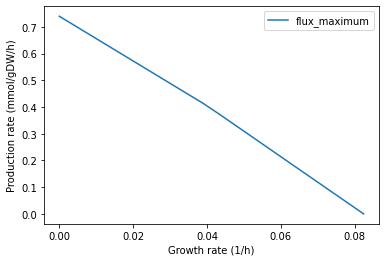

In [45]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope, add_envelope

ppp = production_envelope(model,
                    reactions=[model.reactions.BIOMASS_Ec_SynAuto],
                    objective=model.reactions.EX_isp_e)
ppp.plot(x='BIOMASS_Ec_SynAuto', y='flux_maximum', xlabel = 'Growth rate (1/h)', ylabel = 'Production rate (mmol/gDW/h)')

### Set growth and alkene production rate

In [46]:
pfba_solution = cobra.flux_analysis.pfba(model)
uMAX = pfba_solution.fluxes["BIOMASS_Ec_SynAuto"]
uMAX

0.08239859326999976

In [47]:
model.reactions.BIOMASS_Ec_SynAuto.lower_bound = 0.1 * uMAX
model.objective = model.reactions.EX_isp_e
pfba_solution = cobra.flux_analysis.pfba(model)
production = abs(pfba_solution.fluxes["EX_isp_e"])
production

0.6709873489243801

In [140]:
pip install escher

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: ipywidgets<8,>=7.4.0 in c:\programdata\anaconda3\envs\cobrapy_ms\lib\site-packages (from escher) (7.6.2)



In [143]:
import escher
from escher import Builder

pfba_solution_escher = cobra.flux_analysis.pfba(model)

builder = Builder(
    map_json = '#AMP_SOG_SER_PSP_map_titles.json',
    model_json='iJN678_2023_isoprene_auto.json',
    reaction_data=abs(pfba_solution_escher.fluxes)
)

builder.save_html('AMP_SOG_SER_PSP_iJN678_2023_isoprene_auto.html')

### Productivity and yield

In [147]:
#Productivity and yield

with model as model:
    model.objective = model.reactions.EX_isp_e
    pfba_solution = cobra.flux_analysis.pfba(model)
    production = abs(pfba_solution.fluxes["EX_isp_e"])
    print("Maximum productivity =", production, "[mmol p/gDW/h]")
       
    #Calculate a molar yield (mol product / mol carbon source)
    maximum_theoretical_yield = production / abs(pfba_solution.fluxes["EX_hco3_e"])
    print("Maximum theoretical molar yield =", maximum_theoretical_yield, "[mmol p / mmol s]")
          
    #Calculate a mass yield instead of molar yield (g (product) / g (carbon source))
    mw_p = model.metabolites.get_by_id("isp_e").formula_weight
    mw_s = model.metabolites.hco3_c.formula_weight
    g_dw_p_per_g_s = "{:.2f}".format(maximum_theoretical_yield * (mw_p / mw_s))
    print("Maximum theoretical mass yield =", g_dw_p_per_g_s, "[gram p / gram s]")

    #Calculate C-mol yield (C-mol product / C-mol carbon source)
    #print(model.metabolites.get_by_id("isp_e").formula)
    #print(model.metabolites.get_by_id("hco3_e").formula)
    cmol_p = mw_p/5
    cmol_s = mw_s/1
    cmol_yield = float(g_dw_p_per_g_s) * float(cmol_s/cmol_p)
    print("C-mol yield =", cmol_yield, "[C-mol p / C-mol s]")

Maximum productivity = 0.6709873489243691 [mmol p/gDW/h]
Maximum theoretical molar yield = 0.18134794909844465 [mmol p / mmol s]
Maximum theoretical mass yield = 0.20 [gram p / gram s]
C-mol yield = 0.8957649644684985 [C-mol p / C-mol s]


In [49]:
data = {'Productivity ': [production], 'Mass yield': [g_dw_p_per_g_s], 'C-mol yield': [cmol_yield]}
productivity = pd.DataFrame(data=data, index=['Isoprene'])
productivity_round = productivity.round(2)
productivity_round

,Productivity,Mass yield,C-mol yield
Isoprene,0.67,0.20,0.9


In [50]:
import pickle

with open('isoprene_auto_productivity.pickle', 'wb') as handle:
    pickle.dump(productivity_round, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Flux variability analysis

In [51]:
from cobra.flux_analysis.variability import flux_variability_analysis

fva = flux_variability_analysis(model, fraction_of_optimum = 0.95, reaction_list=model.reactions)

for rxn in model.reactions: 
    pfba_all = pfba_solution.fluxes.to_frame()

merge = pfba_all.join(fva)

with pd.ExcelWriter('pfba_fva_isoprene_auto_all.xlsx') as writer:
    merge.to_excel(writer, sheet_name='auto_isoprene')

In [52]:
#Pyruvate

df_pyr = model.metabolites.pyr_c.summary(fva=0.95).to_frame()
rxn_name_pyr = []
rxn_subsystem_pyr = []
rxn_string_pyr = []

rxn_pyr = df_pyr['reaction'].tolist()
for i in range(len(rxn_pyr)):
    for j in range(len(model.reactions)):
        if model.reactions[j].id == rxn_pyr[i]:
            name_pyr = model.reactions[j].name
            rxn_name_pyr.append(name_pyr)
            subsystem_pyr = model.reactions[j].subsystem
            rxn_subsystem_pyr.append(subsystem_pyr)
            string_pyr = model.reactions[j].build_reaction_string()
            rxn_string_pyr.append(string_pyr)
df_pyr.insert(0, 'desciption', rxn_name_pyr)
df_pyr.insert(1, 'subsystem', rxn_subsystem_pyr)
df_pyr.insert(7, 'string', rxn_string_pyr)

#create dataframe from producing fluxes where the metabolite is a product in the reaction.
df_pyr_produce = df_pyr.loc[((df_pyr["flux"] > 0) & ((df_pyr["factor"] > 0) | (df_pyr["factor"] < 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#create dataframe from consuming fluxes where the metabolite is a substrate in the reaction.
df_pyr_consume = df_pyr.loc[((df_pyr["flux"] < 0) & ((df_pyr["factor"] < 0) | (df_pyr["factor"] > 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#add flux percentage
percent_pyr_produce = (df_pyr_produce['flux'] / 
                  df_pyr_produce['flux'].sum()) * 100
df_pyr_produce.insert(3, 'percent', percent_pyr_produce)

percent_pyr_consume = (df_pyr_consume['flux'] / 
                  df_pyr_consume['flux'].sum()) * 100
df_pyr_consume.insert(3, 'percent', percent_pyr_consume)

In [53]:
df_pyr_produce.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
PYK4,Pyruvate kinase(4),Glycolysis/Gluconeogenesis,0.672400,96.851119,0.000000,4.146637,cdp_c + h_c + pep_c --> ctp_c + pyr_c
PYK,Pyruvate kinase,Glycolysis/Gluconeogenesis,0.013378,1.926918,0.000000,4.145776,adp_c + h_c + pep_c --> atp_c + pyr_c
PYK2,Pyruvate kinase(2),Glycolysis/Gluconeogenesis,0.004689,0.675344,0.000000,4.145553,h_c + pep_c + udp_c --> pyr_c + utp_c
PYK3,Pyruvate kinase(3),Glycolysis/Gluconeogenesis,0.003179,0.457930,0.000000,4.145843,gdp_c + h_c + pep_c --> gtp_c + pyr_c
ANS,Anthranilate synthase,Phenylalanine tyrosine and tryptophan biosynth...,0.000587,0.084619,0.000587,0.000883,chor_c + gln__L_c --> anth_c + glu__L_c + h_c ...
SHCHCS2,"2-succinyl-6-hydroxy-2,4-cyclohexadiene 1-carb...",Ubiquinone and other pterpenoids biosynthesis,0.000014,0.001952,0.000014,0.000020,ichor_c + ssaltpp_c --> 2shchc_c + pyr_c + thm...
ADCL,4-aminobenzoate synthase,Folate biosynthesis,0.000007,0.001059,0.000000,0.000011,4adcho_c --> 4abz_c + h_c + pyr_c
AGTi,Alanine glyoxylate aminotransferase irreversi...,Glyoxylate and dicarboxylate metabolism,0.000007,0.001059,-0.005777,0.385988,ala__L_c + glx_c <=> gly_c + pyr_c


In [54]:
df_pyr_consume.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
DXPS,1-deoxy-D-xylulose 5-phosphate synthase,Sterol biosynthesis,-0.672462,96.860068,-0.672569,-0.638892,g3p_c + h_c + pyr_c --> co2_c + dxyl5p_c
ACLS,Acetolactate synthase,C5-Branched dibasic acid metabolism,-0.013773,1.983885,-0.020696,-0.013764,h_c + 2.0 pyr_c --> alac__S_c + co2_c
ALAD_L,L-alanine dehydrogenase,"Alanine, aspartate and glutamate metabolism",-0.003851,0.554648,-0.389831,0.000000,ala__L_c + h2o_c + nad_c <-- h_c + nadh_c + nh...
ACHBS,2-aceto-2-hydroxybutanoate synthase,Valine leucine and isoleucine biosynthesis,-0.002380,0.342870,-0.003578,-0.002380,2obut_c + h_c + pyr_c --> 2ahbut_c + co2_c
DHDPS,Dihydrodipicolinate synthase,Lysine metabolism,-0.001795,0.258530,-0.002698,-0.001795,aspsa_c + pyr_c --> 23dhdp_c + 2.0 h2o_c + h_c


In [55]:
#ATP

df_atp = model.metabolites.atp_c.summary(fva=0.95).to_frame()
rxn_name_atp = []
rxn_subsystem_atp = []
rxn_string_atp = []

rxn_atp = df_atp['reaction'].tolist()
for i in range(len(rxn_atp)):
    for j in range(len(model.reactions)):
        if model.reactions[j].id == rxn_atp[i]:
            name_atp = model.reactions[j].name
            rxn_name_atp.append(name_atp)
            subsystem_atp = model.reactions[j].subsystem
            rxn_subsystem_atp.append(subsystem_atp)
            string_atp = model.reactions[j].build_reaction_string()
            rxn_string_atp.append(string_atp)
df_atp.insert(0, 'desciption', rxn_name_atp)
df_atp.insert(1, 'subsystem', rxn_subsystem_atp)
df_atp.insert(7, 'string', rxn_string_atp)

#create dataframe from producing fluxes where the metabolite is a product in the reaction.
df_atp_produce = df_atp.loc[((df_atp["flux"] > 0) & ((df_atp["factor"] > 0) | (df_atp["factor"] < 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#create dataframe from consuming fluxes where the metabolite is a substrate in the reaction.
df_atp_consume = df_atp.loc[((df_atp["flux"] < 0) & ((df_atp["factor"] < 0) | (df_atp["factor"] > 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#add flux percentage
percent_atp_produce = (df_atp_produce['flux'] / 
                  df_atp_produce['flux'].sum()) * 100
df_atp_produce.insert(3, 'percent', percent_atp_produce)

percent_atp_consume = (df_atp_consume['flux'] / 
                  df_atp_consume['flux'].sum()) * 100
df_atp_consume.insert(3, 'percent', percent_atp_consume)

In [56]:
df_atp_produce.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
ATPSu,ATP synthetase(u),Oxidative phosphorylation,16.188259,96.845444,13.917029,17.200812,3.0 adp_c + 14.0 h_u + 3.0 pi_c --> 3.0 atp_c ...
ATPS4rpp_1,ATP synthase (four protons for one ATP) (perip...,Oxidative phosphorylation,0.513705,3.073212,0.000000,1.956613,3.0 adp_c + 14.0 h_p + 3.0 pi_c --> 3.0 atp_c ...
PYK,Pyruvate kinase,Glycolysis/Gluconeogenesis,0.013378,0.080032,0.000000,4.145776,adp_c + h_c + pep_c --> atp_c + pyr_c
URIDK2r,Uridylate kinase (dUMP),Pyrimidine metabolism,0.000218,0.001301,0.000218,0.000327,atp_c + dump_c <=> adp_c + dudp_c
PPK2,Polyphosphate kinase,Oxidative phosphorylation,0.000002,0.000011,0.000002,0.000003,atp_c + ppi_c <=> adp_c + pppi_c


In [57]:
df_atp_consume.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
PGK,Phosphoglycerate kinase,Glycolysis/Gluconeogenesis,-8.017975,47.967128,-9.986193,-7.643939,3pg_c + atp_c <=> 13dpg_c + adp_c
PRUK,Phosphoribulokinase,Carbon fixation,-4.375615,26.176898,-5.495154,-4.173776,atp_c + ru5p__D_c --> adp_c + h_c + rb15bp_c
BCT1_syn,Bicarbonate transport via ABC system (periplasm),Transport,-2.336630,13.978768,-3.700000,0.000000,atp_c + h2o_c + hco3_p --> adp_c + h_c + hco3_...
CYTK1,Cytidylate kinase (CMP),Pyrimidine metabolism,-0.672593,4.023756,-2.382099,0.232299,atp_c + cmp_c <=> adp_c + cdp_c
CDPMEK,4-(cytidine 5'-diphospho)-2-C-methyl-D-erythri...,Terpenoid backbone biosynthesis,-0.672462,4.022972,-0.672569,-0.638892,4c2me_c + atp_c --> 2p4c2me_c + adp_c + h_c
...,...,...,...,...,...,...,...
GTHS,Glutathione synthetase,Glutamate metabolism,-0.000002,0.000011,-0.000002,0.000000,atp_c + glucys_c + gly_c --> adp_c + gthrd_c +...
LTHRK,L threonine kinase,Porphyrin and chlorophyll metabolism,-0.000002,0.000011,-0.000003,-0.000002,atp_c + thr__L_c --> adp_c + h_c + thrp_c
CYRDAAT,"Cob(I)yrinic acid a,c-diamide adenosyltransferase",Porphyrin and chlorophyll metabolism,-0.000002,0.000011,-0.000003,-0.000002,atp_c + co1dam_c + h_c --> adcobdam_c + pppi_c
COCHL,Cobaltochelatase,Porphyrin and chlorophyll metabolism,-0.000002,0.000011,-0.000003,-0.000002,atp_c + cobalt2_c + h2o_c + hgbam_c --> adp_c ...


In [58]:
#ADP

df_adp = model.metabolites.adp_c.summary(fva=0.95).to_frame()
rxn_name_adp = []
rxn_subsystem_adp = []
rxn_string_adp = []

rxn_adp = df_adp['reaction'].tolist()
for i in range(len(rxn_adp)):
    for j in range(len(model.reactions)):
        if model.reactions[j].id == rxn_adp[i]:
            name_adp = model.reactions[j].name
            rxn_name_adp.append(name_adp)
            subsystem_adp = model.reactions[j].subsystem
            rxn_subsystem_adp.append(subsystem_adp)
            string_adp = model.reactions[j].build_reaction_string()
            rxn_string_adp.append(string_adp)
df_adp.insert(0, 'desciption', rxn_name_adp)
df_adp.insert(1, 'subsystem', rxn_subsystem_adp)
df_adp.insert(7, 'string', rxn_string_adp)

#create dataframe from producing fluxes where the metabolite is a product in the reaction.
df_adp_produce = df_adp.loc[((df_adp["flux"] > 0) & ((df_adp["factor"] > 0) | (df_adp["factor"] < 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#create dataframe from consuming fluxes where the metabolite is a substrate in the reaction.
df_adp_consume = df_adp.loc[((df_adp["flux"] < 0) & ((df_adp["factor"] < 0) | (df_adp["factor"] > 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#add flux percentage
percent_adp_produce = (df_adp_produce['flux'] / 
                  df_adp_produce['flux'].sum()) * 100
df_adp_produce.insert(3, 'percent', percent_adp_produce)

percent_adp_consume = (df_adp_consume['flux'] / 
                  df_adp_consume['flux'].sum()) * 100
df_adp_consume.insert(3, 'percent', percent_adp_consume)

In [59]:
df_adp_produce.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
PGK,Phosphoglycerate kinase,Glycolysis/Gluconeogenesis,8.017975,47.966506,7.643939,9.986193,3pg_c + atp_c <=> 13dpg_c + adp_c
PRUK,Phosphoribulokinase,Carbon fixation,4.375615,26.176558,4.173776,5.495154,atp_c + ru5p__D_c --> adp_c + h_c + rb15bp_c
BCT1_syn,Bicarbonate transport via ABC system (periplasm),Transport,2.336630,13.978587,0.000000,3.700000,atp_c + h2o_c + hco3_p --> adp_c + h_c + hco3_...
CYTK1,Cytidylate kinase (CMP),Pyrimidine metabolism,0.672593,4.023704,-0.232299,2.382099,atp_c + cmp_c <=> adp_c + cdp_c
CDPMEK,4-(cytidine 5'-diphospho)-2-C-methyl-D-erythri...,Terpenoid backbone biosynthesis,0.672462,4.022920,0.638892,0.672569,4c2me_c + atp_c --> 2p4c2me_c + adp_c + h_c
...,...,...,...,...,...,...,...
LTHRK,L threonine kinase,Porphyrin and chlorophyll metabolism,0.000002,0.000011,0.000002,0.000003,atp_c + thr__L_c --> adp_c + h_c + thrp_c
GLUCYS,Gamma-glutamylcysteine synthetase,Glutamate metabolism,0.000002,0.000011,0.000000,0.000002,atp_c + cys__L_c + glu__L_c --> adp_c + glucys...
COCHL,Cobaltochelatase,Porphyrin and chlorophyll metabolism,0.000002,0.000011,0.000002,0.000003,atp_c + cobalt2_c + h2o_c + hgbam_c --> adp_c ...
ADCPS2,Adenosylcobinamide-phosphate synthase,Porphyrin and chlorophyll metabolism,0.000002,0.000011,0.000002,0.000003,adcobhex_c + applp_c + atp_c --> adocbip_c + a...


In [60]:
df_adp_consume.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
ATPSu,ATP synthetase(u),Oxidative phosphorylation,-16.188259,96.844187,-17.200812,-13.917029,3.0 adp_c + 14.0 h_u + 3.0 pi_c --> 3.0 atp_c ...
ATPS4rpp_1,ATP synthase (four protons for one ATP) (perip...,Oxidative phosphorylation,-0.513705,3.073172,-1.956419,0.000000,3.0 adp_c + 14.0 h_p + 3.0 pi_c --> 3.0 atp_c ...
PYK,Pyruvate kinase,Glycolysis/Gluconeogenesis,-0.013378,0.080031,-4.145776,0.000000,adp_c + h_c + pep_c --> atp_c + pyr_c
URIDK2r,Uridylate kinase (dUMP),Pyrimidine metabolism,-0.000218,0.001301,-0.000327,-0.000218,atp_c + dump_c <=> adp_c + dudp_c
RNDR1,Ribonucleoside-diphosphate reductase (ADP),Purine metabolism,-0.000217,0.001297,-0.000326,-0.000217,adp_c + trdrd_c --> dadp_c + h2o_c + trdox_c
PPK2,Polyphosphate kinase,Oxidative phosphorylation,-0.000002,0.000011,-0.000003,-0.000002,atp_c + ppi_c <=> adp_c + pppi_c


In [61]:
#AMP

df_amp = model.metabolites.amp_c.summary(fva=0.95).to_frame()
rxn_name_amp = []
rxn_subsystem_amp = []
rxn_string_amp = []

rxn_amp = df_amp['reaction'].tolist()
for i in range(len(rxn_amp)):
    for j in range(len(model.reactions)):
        if model.reactions[j].id == rxn_amp[i]:
            name_amp = model.reactions[j].name
            rxn_name_amp.append(name_amp)
            subsystem_amp = model.reactions[j].subsystem
            rxn_subsystem_amp.append(subsystem_amp)
            string_amp = model.reactions[j].build_reaction_string()
            rxn_string_amp.append(string_amp)
df_amp.insert(0, 'desciption', rxn_name_amp)
df_amp.insert(1, 'subsystem', rxn_subsystem_amp)
df_amp.insert(7, 'string', rxn_string_amp)

#create dataframe from producing fluxes where the metabolite is a product in the reaction.
df_amp_produce = df_amp.loc[((df_amp["flux"] > 0) & ((df_amp["factor"] > 0) | (df_amp["factor"] < 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#create dataframe from consuming fluxes where the metabolite is a substrate in the reaction.
df_amp_consume = df_amp.loc[((df_amp["flux"] < 0) & ((df_amp["factor"] < 0) | (df_amp["factor"] > 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#add flux percentage
percent_amp_produce = (df_amp_produce['flux'] / 
                  df_amp_produce['flux'].sum()) * 100
df_amp_produce.insert(3, 'percent', percent_amp_produce)

percent_amp_consume = (df_amp_consume['flux'] / 
                  df_amp_consume['flux'].sum()) * 100
df_amp_consume.insert(3, 'percent', percent_amp_consume)

In [62]:
df_amp_produce.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
PRPPS,Phosphoribosylpyrophosphate synthetase,Pentose phosphate pathway,0.006815,39.473797,0.006777,1.750062,atp_c + r5p_c <=> amp_c + h_c + prpp_c
ARGSS,Argininosuccinate synthase,"Alanine, aspartate and glutamate metabolism",0.002241,12.980071,0.002241,1.576427,asp__L_c + atp_c + citr__L_c --> amp_c + argsu...
ADSL1r,Adenylsuccinate lyase,Purine metabolism,0.002074,12.012121,0.002065,0.003114,dcamp_c <=> amp_c + fum_c
ASNS1,Asparagine synthase (glutamine-hydrolysing),Nitrogen metabolism,0.001537,8.904925,0.001537,1.163436,asp__L_c + atp_c + gln__L_c + h2o_c --> amp_c ...
BPNT,"3',5'-bisphosphate nucleotidase",Sulfur Cysteine and methionine metabolism,0.001532,8.874689,0.001526,0.002302,h2o_c + pap_c --> amp_c + pi_c
GLUTRS,Glutamyl-tRNA synthetase,Glutamate metabolism,0.001456,8.431789,0.001456,0.002188,atp_c + glu__L_c + trnaglu_c --> amp_c + glutr...
GMPS,GMP synthase,Glutamate metabolism,0.001302,7.541899,0.000000,0.001957,atp_c + nh4_c + xmp_c --> amp_c + gmp_c + 2.0 ...
ADPT,Adenine phosphoribosyltransferase,Purine metabolism,0.000263,1.523408,0.000248,1.743203,ade_c + prpp_c --> amp_c + ppi_c
NADS2,Nicotinate-mononucleotide adenylyltransferase,Glutamate metabolism,0.000019,0.108724,0.000015,0.000028,atp_c + dnad_c + gln__L_c + h2o_c --> amp_c + ...
SUCBZL,O-succinylbenzoate-CoA ligase,Ubiquinone and other pterpenoids biosynthesis,0.000014,0.078482,0.000014,0.000020,atp_c + coa_c + sucbz_c --> amp_c + ppi_c + sb...


In [63]:
df_amp_consume.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
ADK1,Adenylate kinase,Purine metabolism,-0.017265,100.0,-3.503312,-0.017216,amp_c + atp_c <=> 2.0 adp_c


In [64]:
#Pi

df_pi = model.metabolites.pi_c.summary(fva=0.95).to_frame()
rxn_name_pi = []
rxn_subsystem_pi = []
rxn_string_pi = []

rxn_pi = df_pi['reaction'].tolist()
for i in range(len(rxn_pi)):
    for j in range(len(model.reactions)):
        if model.reactions[j].id == rxn_pi[i]:
            name_pi = model.reactions[j].name
            rxn_name_pi.append(name_pi)
            subsystem_pi = model.reactions[j].subsystem
            rxn_subsystem_pi.append(subsystem_pi)
            string_pi = model.reactions[j].build_reaction_string()
            rxn_string_pi.append(string_pi)
df_pi.insert(0, 'desciption', rxn_name_pi)
df_pi.insert(1, 'subsystem', rxn_subsystem_pi)
df_pi.insert(7, 'string', rxn_string_pi)

#create dataframe from producing fluxes where the metabolite is a product in the reaction.
df_pi_produce = df_pi.loc[((df_pi["flux"] > 0) & ((df_pi["factor"] > 0) | (df_pi["factor"] < 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#create dataframe from consuming fluxes where the metabolite is a substrate in the reaction.
df_pi_consume = df_pi.loc[((df_pi["flux"] < 0) & ((df_pi["factor"] < 0) | (df_pi["factor"] > 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#add flux percentage
percent_pi_produce = (df_pi_produce['flux'] / 
                  df_pi_produce['flux'].sum()) * 100
df_pi_produce.insert(3, 'percent', percent_pi_produce)

percent_pi_consume = (df_pi_consume['flux'] / 
                  df_pi_consume['flux'].sum()) * 100
df_pi_consume.insert(3, 'percent', percent_pi_consume)

In [65]:
df_pi_produce.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
GAPDi_nadp,Glyceraldehyde-3-phosphate dehydrogenase (NAD(...,Carbon fixation,8.017975,47.882978,7.643854,13.131445,13dpg_c + h_c + nadph_c --> g3p_c + nadp_c + pi_c
PPA,Inorganic diphosphatase,Oxidative phosphorylation,2.740530,16.366318,2.606095,9.579131,h2o_c + ppi_c --> h_c + 2.0 pi_c
BCT1_syn,Bicarbonate transport via ABC system (periplasm),Transport,2.336630,13.954245,0.000000,3.700000,atp_c + h2o_c + hco3_p --> adp_c + h_c + hco3_...
FBP,Fructose-bisphosphatase,Glycolysis/Gluconeogenesis,1.481212,8.845728,0.000000,6.306991,fdp_c + h2o_c --> f6p_c + pi_c
SBP,Sedoheptulose-bisphosphatase,Carbon fixation,1.473899,8.802059,0.000000,6.305215,h2o_c + s17bp_c --> pi_c + s7p_c
...,...,...,...,...,...,...,...
ADCPS2,Adenosylcobinamide-phosphate synthase,Porphyrin and chlorophyll metabolism,0.000002,0.000011,0.000002,0.000003,adcobhex_c + applp_c + atp_c --> adocbip_c + a...
GTHS,Glutathione synthetase,Glutamate metabolism,0.000002,0.000011,0.000000,0.000002,atp_c + glucys_c + gly_c --> adp_c + gthrd_c +...
GLUCYS,Gamma-glutamylcysteine synthetase,Glutamate metabolism,0.000002,0.000011,0.000000,0.000002,atp_c + cys__L_c + glu__L_c --> adp_c + glucys...
COCHL,Cobaltochelatase,Porphyrin and chlorophyll metabolism,0.000002,0.000011,0.000002,0.000003,atp_c + cobalt2_c + h2o_c + hgbam_c --> adp_c ...


In [66]:
df_pi_consume.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
ATPSu,ATP synthetase(u),Oxidative phosphorylation,-16.188259,96.675544,-17.200812,-13.917029,3.0 adp_c + 14.0 h_u + 3.0 pi_c --> 3.0 atp_c ...
ATPS4rpp_1,ATP synthase (four protons for one ATP) (perip...,Oxidative phosphorylation,-0.513705,3.067820,-1.956419,0.000000,3.0 adp_c + 14.0 h_p + 3.0 pi_c --> 3.0 atp_c ...
PKETF,Phosphoketolase (fructose-6-phosphate utilizing),Pentose phosphate pathway,-0.042711,0.255065,-0.535675,0.000000,f6p_c + pi_c --> actp_c + e4p_c + h2o_c
PUNP1,Purine-nucleoside phosphorylase (Adenosine),Pyrimidine metabolism,-0.000207,0.001239,-1.743477,-0.000193,adn_c + pi_c <=> ade_c + r1p_c
MTAP,5 methylthioadenosine phosphorylase,Sulfur Cysteine and methionine metabolism,-0.000056,0.000332,-0.000084,-0.000056,5mta_c + pi_c --> 5mdr1p_c + ade_c


In [67]:
#NADPH

df_nadph = model.metabolites.nadph_c.summary(fva=0.95).to_frame()
rxn_name_nadph = []
rxn_subsystem_nadph = []
rxn_string_nadph = []

rxn_nadph = df_nadph['reaction'].tolist()
for i in range(len(rxn_nadph)):
    for j in range(len(model.reactions)):
        if model.reactions[j].id == rxn_nadph[i]:
            name_nadph = model.reactions[j].name
            rxn_name_nadph.append(name_nadph)
            subsystem_nadph = model.reactions[j].subsystem
            rxn_subsystem_nadph.append(subsystem_nadph)
            string_nadph = model.reactions[j].build_reaction_string()
            rxn_string_nadph.append(string_nadph)
df_nadph.insert(0, 'desciption', rxn_name_nadph)
df_nadph.insert(1, 'subsystem', rxn_subsystem_nadph)
df_nadph.insert(7, 'string', rxn_string_nadph)

#create dataframe from producing fluxes where the metabolite is a product in the reaction.
df_nadph_produce = df_nadph.loc[((df_nadph["flux"] > 0) & ((df_nadph["factor"] > 0) | (df_nadph["factor"] < 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#create dataframe from consuming fluxes where the metabolite is a substrate in the reaction.
df_nadph_consume = df_nadph.loc[((df_nadph["flux"] < 0) & ((df_nadph["factor"] < 0) | (df_nadph["factor"] > 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#add flux percentage
percent_nadph_produce = (df_nadph_produce['flux'] / 
                  df_nadph_produce['flux'].sum()) * 100
df_nadph_produce.insert(3, 'percent', percent_nadph_produce)

percent_nadph_consume = (df_nadph_consume['flux'] / 
                  df_nadph_consume['flux'].sum()) * 100
df_nadph_consume.insert(3, 'percent', percent_nadph_consume)

In [68]:
df_nadph_produce.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
FNOR,Ferredoxin---NADP+ reductase,Photosynthesis,1.014988e+01,99.821826,6.189881,12.646357,2.0 fdxrd_c + h_c + nadp_c <=> 2.0 fdxo_2_2_c ...
ICDHyr,Isocitrate dehydrogenase (NADP),Citrate cycle (TCA cycle),1.027970e-02,0.101099,0.010256,0.503305,icit_c + nadp_c --> akg_c + co2_c + nadph_c
MTHFD,Methylenetetrahydrofolate dehydrogenase (NADP),Glyoxylate and dicarboxylate metabolism,6.029523e-03,0.059299,0.000000,0.009056,mlthf_c + nadp_c --> methf_c + nadph_c
TYRA,Arogenate dehydrogenase,Phenylalanine tyrosine and tryptophan biosynth...,1.110535e-03,0.010922,0.000000,0.001669,Largn_c + nadp_c --> co2_c + h_c + nadph_c + t...
MPOMC2,magnesium-protoporphyrin-IX 13-monomethyl est...,Porphyrin and chlorophyll metabolism,1.746109e-04,0.001717,0.000000,0.000262,h2o_c + mppp9om_c + nadp_c --> h_c + hmppp9_c ...
MPOMMM2,Magnesium-protoporphyrin-IX 13-monomethyl este...,Porphyrin and chlorophyll metabolism,1.746109e-04,0.001717,0.000000,0.000262,hmppp9_c + nadp_c --> h_c + nadph_c + omppp9_c
MPOMOR2,magnesium-protoporphyrin-IX 13-monomethyl est...,Porphyrin and chlorophyll metabolism,1.746109e-04,0.001717,0.000000,0.000262,nadp_c + omppp9_c --> dvpchlld_c + h_c + nadph_c
PHYTEDH2,Phytoene dehydrogenase(2),Carotenoid Biosynthesis,8.619058e-05,0.000848,0.000000,0.000130,nadp_c + phytoe_c --> h_c + nadph_c + phytof_c
PHYTFDH2,Phytofluene dehydrogenase(2),Carotenoid Biosynthesis,8.619058e-05,0.000848,0.000000,0.000130,nadp_c + phytof_c --> h_c + nadph_c + zcarote_c
SSALy,Succinate-semialdehyde dehydrogenase (NADP),C5-Branched dibasic acid metabolism,8.097063e-07,0.000008,0.000000,0.492928,h2o_c + nadp_c + sucsal_c <=> 2.0 h_c + nadph_...


In [69]:
df_nadph_consume.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
GAPDi_nadp,Glyceraldehyde-3-phosphate dehydrogenase (NAD(...,Carbon fixation,-8.017975,78.855002,-13.131445,-7.643854,13dpg_c + h_c + nadph_c --> g3p_c + nadp_c + pi_c
MECDPDH_syn,"2C-methyl-D-erythritol 2,4 cyclodiphosphate de...",Terpenoid backbone biosynthesis,-0.672462,6.613519,-0.672569,-0.638892,2mecdp_c + nadph_c --> h2mb4p_c + h2o_c + nadp_c
DXPRIi,1-deoxy-D-xylulose reductoisomerase,Sterol biosynthesis,-0.672462,6.613519,-0.672569,-0.638892,dxyl5p_c + h_c + nadph_c --> 2me4p_c + nadp_c
DMPPS_syn,1-hydroxy-2-methyl-2-(E)-butenyl 4-diphosphate...,Terpenoid backbone biosynthesis,-0.671356,6.602640,-0.672563,0.000000,h2mb4p_c + h_c + nadph_c --> dmpp_c + h2o_c + ...
GLUDy,Glutamate dehydrogenase (NADP),Nitrogen metabolism,-0.056519,0.555856,-1.680738,3.432475,glu__L_c + h2o_c + nadp_c <=> akg_c + h_c + na...
ASAD,Aspartate-semialdehyde dehydrogenase,"Alanine, aspartate and glutamate metabolism",-0.007061,0.069446,-0.010601,-0.007061,aspsa_c + nadp_c + pi_c <-- 4pasp_c + h_c + na...
KARA1,"Ketol-acid reductoisomerase (2,3-dihydroxy-3-m...",Valine leucine and isoleucine biosynthesis,-0.006887,0.067729,-0.010348,-0.006882,23dhmb_c + nadp_c <-- alac__S_c + h_c + nadph_c
3OAR100,3-oxoacyl-[acyl-carrier-protein] reductase (n-...,Fatty acid biosynthesis,-0.003425,0.033680,-0.005147,-0.003425,3odecACP_c + h_c + nadph_c <=> 3hdecACP_c + na...
EAR80y,Enoyl-[acyl-carrier-protein] reductase (NADPH)...,Fatty acid biosynthesis,-0.003425,0.033680,-0.005147,-0.003425,h_c + nadph_c + toct2eACP_c --> nadp_c + ocACP_c
EAR60y,Enoyl-[acyl-carrier-protein] reductase (NADPH)...,Fatty acid biosynthesis,-0.003425,0.033680,-0.005148,-0.003425,h_c + nadph_c + thex2eACP_c --> hexACP_c + nadp_c


In [70]:
#NADP

df_nadp = model.metabolites.nadp_c.summary(fva=0.95).to_frame()
rxn_name_nadp = []
rxn_subsystem_nadp = []
rxn_string_nadp = []

rxn_nadp = df_nadp['reaction'].tolist()
for i in range(len(rxn_nadp)):
    for j in range(len(model.reactions)):
        if model.reactions[j].id == rxn_nadp[i]:
            name_nadp = model.reactions[j].name
            rxn_name_nadp.append(name_nadp)
            subsystem_nadp = model.reactions[j].subsystem
            rxn_subsystem_nadp.append(subsystem_nadp)
            string_nadp = model.reactions[j].build_reaction_string()
            rxn_string_nadp.append(string_nadp)
df_nadp.insert(0, 'desciption', rxn_name_nadp)
df_nadp.insert(1, 'subsystem', rxn_subsystem_nadp)
df_nadp.insert(7, 'string', rxn_string_nadp)

#create dataframe from producing fluxes where the metabolite is a product in the reaction.
df_nadp_produce = df_nadp.loc[((df_nadp["flux"] > 0) & ((df_nadp["factor"] > 0) | (df_nadp["factor"] < 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#create dataframe from consuming fluxes where the metabolite is a substrate in the reaction.
df_nadp_consume = df_nadp.loc[((df_nadp["flux"] < 0) & ((df_nadp["factor"] < 0) | (df_nadp["factor"] > 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#add flux percentage
percent_nadp_produce = (df_nadp_produce['flux'] / 
                  df_nadp_produce['flux'].sum()) * 100
df_nadp_produce.insert(3, 'percent', percent_nadp_produce)

percent_nadp_consume = (df_nadp_consume['flux'] / 
                  df_nadp_consume['flux'].sum()) * 100
df_nadp_consume.insert(3, 'percent', percent_nadp_consume)

In [71]:
df_nadp_produce.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
GAPDi_nadp,Glyceraldehyde-3-phosphate dehydrogenase (NAD(...,Carbon fixation,8.017975,78.854994,7.643854,13.131445,13dpg_c + h_c + nadph_c --> g3p_c + nadp_c + pi_c
DXPRIi,1-deoxy-D-xylulose reductoisomerase,Sterol biosynthesis,0.672462,6.613518,0.638892,0.672569,dxyl5p_c + h_c + nadph_c --> 2me4p_c + nadp_c
MECDPDH_syn,"2C-methyl-D-erythritol 2,4 cyclodiphosphate de...",Terpenoid backbone biosynthesis,0.672462,6.613518,0.638892,0.672569,2mecdp_c + nadph_c --> h2mb4p_c + h2o_c + nadp_c
DMPPS_syn,1-hydroxy-2-methyl-2-(E)-butenyl 4-diphosphate...,Terpenoid backbone biosynthesis,0.671356,6.602639,0.000000,0.672563,h2mb4p_c + h_c + nadph_c --> dmpp_c + h2o_c + ...
GLUDy,Glutamate dehydrogenase (NADP),Nitrogen metabolism,0.056519,0.555856,-3.432475,1.680738,glu__L_c + h2o_c + nadp_c <=> akg_c + h_c + na...
ASAD,Aspartate-semialdehyde dehydrogenase,"Alanine, aspartate and glutamate metabolism",0.007061,0.069446,0.007061,0.010601,aspsa_c + nadp_c + pi_c <-- 4pasp_c + h_c + na...
KARA1,"Ketol-acid reductoisomerase (2,3-dihydroxy-3-m...",Valine leucine and isoleucine biosynthesis,0.006887,0.067729,0.006882,0.010348,23dhmb_c + nadp_c <-- alac__S_c + h_c + nadph_c
3OAR100,3-oxoacyl-[acyl-carrier-protein] reductase (n-...,Fatty acid biosynthesis,0.003425,0.033680,0.003425,0.005147,3odecACP_c + h_c + nadph_c <=> 3hdecACP_c + na...
3OAR80,3-oxoacyl-[acyl-carrier-protein] reductase (n-...,Fatty acid biosynthesis,0.003425,0.033680,0.003425,0.005148,3ooctACP_c + h_c + nadph_c <=> 3hoctACP_c + na...
EAR80y,Enoyl-[acyl-carrier-protein] reductase (NADPH)...,Fatty acid biosynthesis,0.003425,0.033680,0.003425,0.005147,h_c + nadph_c + toct2eACP_c --> nadp_c + ocACP_c


In [72]:
df_nadp_consume.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
FNOR,Ferredoxin---NADP+ reductase,Photosynthesis,-1.014988e+01,99.821816,-12.646357,-6.189881e+00,2.0 fdxrd_c + h_c + nadp_c <=> 2.0 fdxo_2_2_c ...
ICDHyr,Isocitrate dehydrogenase (NADP),Citrate cycle (TCA cycle),-1.027970e-02,0.101099,-0.503305,-1.025580e-02,icit_c + nadp_c --> akg_c + co2_c + nadph_c
MTHFD,Methylenetetrahydrofolate dehydrogenase (NADP),Glyoxylate and dicarboxylate metabolism,-6.029523e-03,0.059299,-0.009056,0.000000e+00,mlthf_c + nadp_c --> methf_c + nadph_c
TYRA,Arogenate dehydrogenase,Phenylalanine tyrosine and tryptophan biosynth...,-1.110535e-03,0.010922,-0.001669,0.000000e+00,Largn_c + nadp_c --> co2_c + h_c + nadph_c + t...
MPOMC2,magnesium-protoporphyrin-IX 13-monomethyl est...,Porphyrin and chlorophyll metabolism,-1.746109e-04,0.001717,-0.000262,0.000000e+00,h2o_c + mppp9om_c + nadp_c --> h_c + hmppp9_c ...
MPOMMM2,Magnesium-protoporphyrin-IX 13-monomethyl este...,Porphyrin and chlorophyll metabolism,-1.746109e-04,0.001717,-0.000262,0.000000e+00,hmppp9_c + nadp_c --> h_c + nadph_c + omppp9_c
MPOMOR2,magnesium-protoporphyrin-IX 13-monomethyl est...,Porphyrin and chlorophyll metabolism,-1.746109e-04,0.001717,-0.000262,0.000000e+00,nadp_c + omppp9_c --> dvpchlld_c + h_c + nadph_c
PHYTEDH2,Phytoene dehydrogenase(2),Carotenoid Biosynthesis,-8.619058e-05,0.000848,-0.000130,0.000000e+00,nadp_c + phytoe_c --> h_c + nadph_c + phytof_c
PHYTFDH2,Phytofluene dehydrogenase(2),Carotenoid Biosynthesis,-8.619058e-05,0.000848,-0.000130,0.000000e+00,nadp_c + phytof_c --> h_c + nadph_c + zcarote_c
BIOMASS_Ec_SynAuto,Autotrophic Biomass Ecuation,Biomass and maintenance functions,-9.201451e-07,0.000009,-0.000001,-9.201451e-07,0.000223 10fthf_c + 0.000223 5mthf_c + 0.00027...


In [73]:
#NADH

df_nadh = model.metabolites.nadh_c.summary(fva=0.95).to_frame()
rxn_name_nadh = []
rxn_subsystem_nadh = []
rxn_string_nadh = []

rxn_nadh = df_nadh['reaction'].tolist()
for i in range(len(rxn_nadh)):
    for j in range(len(model.reactions)):
        if model.reactions[j].id == rxn_nadh[i]:
            name_nadh = model.reactions[j].name
            rxn_name_nadh.append(name_nadh)
            subsystem_nadh = model.reactions[j].subsystem
            rxn_subsystem_nadh.append(subsystem_nadh)
            string_nadh = model.reactions[j].build_reaction_string()
            rxn_string_nadh.append(string_nadh)
df_nadh.insert(0, 'desciption', rxn_name_nadh)
df_nadh.insert(1, 'subsystem', rxn_subsystem_nadh)
df_nadh.insert(7, 'string', rxn_string_nadh)

#create dataframe from producing fluxes where the metabolite is a product in the reaction.
df_nadh_produce = df_nadh.loc[((df_nadh["flux"] > 0) & ((df_nadh["factor"] > 0) | (df_nadh["factor"] < 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#create dataframe from consuming fluxes where the metabolite is a substrate in the reaction.
df_nadh_consume = df_nadh.loc[((df_nadh["flux"] < 0) & ((df_nadh["factor"] < 0) | (df_nadh["factor"] > 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#add flux percentage
percent_nadh_produce = (df_nadh_produce['flux'] / 
                  df_nadh_produce['flux'].sum()) * 100
df_nadh_produce.insert(3, 'percent', percent_nadh_produce)

percent_nadh_consume = (df_nadh_consume['flux'] / 
                  df_nadh_consume['flux'].sum()) * 100
df_nadh_consume.insert(3, 'percent', percent_nadh_consume)

In [74]:
df_nadh_produce.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
PGCD,Phosphoglycerate dehydrogenase,Arginine and proline metabolism,0.009537,38.965536,0.000000,1.366032,3pg_c + nad_c --> 3php_c + h_c + nadh_c
MDH,Malate dehydrogenase,Citrate cycle (TCA cycle),0.006985,28.537644,-2.067016,1.581347,mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
IPMD,3-isopropylmalate dehydrogenase,Valine leucine and isoleucine biosynthesis,0.004326,17.674283,0.004326,0.006501,3c2hmp_c + nad_c --> 3c4mop_c + h_c + nadh_c
HISTD,Histidinol dehydrogenase,Histidine metabolism,0.001411,5.766689,0.001411,0.002122,h2o_c + histd_c + 2.0 nad_c --> 3.0 h_c + his_...
IMPD,IMP dehydrogenase,Purine metabolism,0.001302,5.319732,0.001291,0.001956,h2o_c + imp_c + nad_c --> h_c + nadh_c + xmp_c
GLYCLc,Glycine Cleavage System,Photorespiration,0.000900,3.676016,-0.006070,0.207175,dhlprot_c + nad_c <=> h_c + lprot_c + nadh_c
GCALDD,Glycolaldehyde dehydrogenase,Others,0.000007,0.030050,0.000000,0.000011,gcald_c + h2o_c + nad_c --> glyclt_c + 2.0 h_c...
GLYCLTDx,Glycolate dehydrogenase (NAD),Glyoxylate and dicarboxylate metabolism,0.000007,0.030050,0.000000,0.421013,glx_c + h_c + nadh_c <-- glyclt_c + nad_c


In [75]:
df_nadh_consume.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
NDH1_2u,NAD(P)H dehydrogenase (plastoquinone-8 & 3 pro...,Oxidative phosphorylation,-1.097421e-02,44.836096,-2.553748e+00,0.000000e+00,4.0 h_c + nadh_c + pq_u --> 3.0 h_u + nad_c + ...
HSDxi,Homoserine dehydrogenase NADH irreversible,Lysine metabolism,-5.266418e-03,21.516407,-7.915513e-03,-5.266418e-03,aspsa_c + h_c + nadh_c <=> hom__L_c + nad_c
ALAD_L,L-alanine dehydrogenase,"Alanine, aspartate and glutamate metabolism",-3.850706e-03,15.732392,-3.898315e-01,0.000000e+00,ala__L_c + h2o_c + nad_c <-- h_c + nadh_c + nh...
P5CRx,Pyrroline-5-carboxylate reductase(nadh),Arginine and proline metabolism,-1.945513e-03,7.948563,-2.924396e-03,0.000000e+00,1pyr5c_c + 2.0 h_c + nadh_c --> nad_c + pro__L_c
G3PD1ir,Glycerol 3 phosphate dehydrogenase NAD,Glycerolipid metabolism,-1.427582e-03,5.832511,-2.145645e-03,3.935443e-01,dhap_c + h_c + nadh_c <=> glyc3p_c + nad_c
MTHFR2,"5,10-methylenetetrahydrofolate reductase (NADH)",Folate biosynthesis,-1.010570e-03,4.128773,-1.693125e-01,-1.010570e-03,2.0 h_c + mlthf_c + nadh_c --> 5mthf_c + nad_c
CYRDAR,"Cob(II)yrinic acid a,c-diamide reductase",Porphyrin and chlorophyll metabolism,-9.187443e-07,0.003754,-1.315187e-06,-9.187443e-07,2.0 co2dam_c + nadh_c --> 2.0 co1dam_c + h_c +...
BIOMASS_Ec_SynAuto,Autotrophic Biomass Ecuation,Biomass and maintenance functions,-3.680498e-07,0.001504,-5.476467e-07,-3.680498e-07,0.000223 10fthf_c + 0.000223 5mthf_c + 0.00027...


In [76]:
#NAD

df_nad = model.metabolites.nad_c.summary(fva=0.95).to_frame()
rxn_name_nad = []
rxn_subsystem_nad = []
rxn_string_nad = []

rxn_nad = df_nad['reaction'].tolist()
for i in range(len(rxn_nad)):
    for j in range(len(model.reactions)):
        if model.reactions[j].id == rxn_nad[i]:
            name_nad = model.reactions[j].name
            rxn_name_nad.append(name_nad)
            subsystem_nad = model.reactions[j].subsystem
            rxn_subsystem_nad.append(subsystem_nad)
            string_nad = model.reactions[j].build_reaction_string()
            rxn_string_nad.append(string_nad)
df_nad.insert(0, 'desciption', rxn_name_nad)
df_nad.insert(1, 'subsystem', rxn_subsystem_nad)
df_nad.insert(7, 'string', rxn_string_nad)

#create dataframe from producing fluxes where the metabolite is a product in the reaction.
df_nad_produce = df_nad.loc[((df_nad["flux"] > 0) & ((df_nad["factor"] > 0) | (df_nad["factor"] < 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#create dataframe from consuming fluxes where the metabolite is a substrate in the reaction.
df_nad_consume = df_nad.loc[((df_nad["flux"] < 0) & ((df_nad["factor"] < 0) | (df_nad["factor"] > 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#add flux percentage
percent_nad_produce = (df_nad_produce['flux'] / 
                  df_nad_produce['flux'].sum()) * 100
df_nad_produce.insert(3, 'percent', percent_nad_produce)

percent_nad_consume = (df_nad_consume['flux'] / 
                  df_nad_consume['flux'].sum()) * 100
df_nad_consume.insert(3, 'percent', percent_nad_consume)

In [77]:
df_nad_produce.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
NDH1_2u,NAD(P)H dehydrogenase (plastoquinone-8 & 3 pro...,Oxidative phosphorylation,1.097421e-02,44.802411,0.000000e+00,2.553748,4.0 h_c + nadh_c + pq_u --> 3.0 h_u + nad_c + ...
HSDxi,Homoserine dehydrogenase NADH irreversible,Lysine metabolism,5.266418e-03,21.500242,5.266418e-03,0.007916,aspsa_c + h_c + nadh_c <=> hom__L_c + nad_c
ALAD_L,L-alanine dehydrogenase,"Alanine, aspartate and glutamate metabolism",3.850706e-03,15.720573,0.000000e+00,0.389831,ala__L_c + h2o_c + nad_c <-- h_c + nadh_c + nh...
P5CRx,Pyrroline-5-carboxylate reductase(nadh),Arginine and proline metabolism,1.945513e-03,7.942591,0.000000e+00,0.002924,1pyr5c_c + 2.0 h_c + nadh_c --> nad_c + pro__L_c
G3PD1ir,Glycerol 3 phosphate dehydrogenase NAD,Glycerolipid metabolism,1.427582e-03,5.828129,-3.935443e-01,0.002146,dhap_c + h_c + nadh_c <=> glyc3p_c + nad_c
MTHFR2,"5,10-methylenetetrahydrofolate reductase (NADH)",Folate biosynthesis,1.010570e-03,4.125671,1.010570e-03,0.169313,2.0 h_c + mlthf_c + nadh_c --> 5mthf_c + nad_c
NADS2,Nicotinate-mononucleotide adenylyltransferase,Glutamate metabolism,1.877070e-05,0.076632,1.509021e-05,0.000028,atp_c + dnad_c + gln__L_c + h2o_c --> amp_c + ...
CYRDAR,"Cob(II)yrinic acid a,c-diamide reductase",Porphyrin and chlorophyll metabolism,9.187443e-07,0.003751,9.187443e-07,0.000001,2.0 co2dam_c + nadh_c --> 2.0 co1dam_c + h_c +...


In [78]:
df_nad_consume.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
PGCD,Phosphoglycerate dehydrogenase,Arginine and proline metabolism,-0.009537,38.936261,-1.366032,0.000000,3pg_c + nad_c --> 3php_c + h_c + nadh_c
MDH,Malate dehydrogenase,Citrate cycle (TCA cycle),-0.006985,28.516203,-1.581347,2.067016,mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
IPMD,3-isopropylmalate dehydrogenase,Valine leucine and isoleucine biosynthesis,-0.004326,17.661005,-0.006501,-0.004326,3c2hmp_c + nad_c --> 3c4mop_c + h_c + nadh_c
HISTD,Histidinol dehydrogenase,Histidine metabolism,-0.001411,5.762356,-0.002122,-0.001411,h2o_c + histd_c + 2.0 nad_c --> 3.0 h_c + his_...
IMPD,IMP dehydrogenase,Purine metabolism,-0.001302,5.315735,-0.001956,-0.001291,h2o_c + imp_c + nad_c --> h_c + nadh_c + xmp_c
GLYCLc,Glycine Cleavage System,Photorespiration,-0.000900,3.673254,-0.207175,0.006070,dhlprot_c + nad_c <=> h_c + lprot_c + nadh_c
BIOMASS_Ec_SynAuto,Autotrophic Biomass Ecuation,Biomass and maintenance functions,-0.000015,0.060103,-0.000022,-0.000015,0.000223 10fthf_c + 0.000223 5mthf_c + 0.00027...
GCALDD,Glycolaldehyde dehydrogenase,Others,-0.000007,0.030028,-0.000011,0.000000,gcald_c + h2o_c + nad_c --> glyclt_c + 2.0 h_c...
GLYCLTDx,Glycolate dehydrogenase (NAD),Glyoxylate and dicarboxylate metabolism,-0.000007,0.030028,-0.421013,0.000000,glx_c + h_c + nadh_c <-- glyclt_c + nad_c
NADK,NAD kinase,Pantothenate and CoA biosynthesis,-0.000004,0.015026,-0.000006,-0.000004,atp_c + nad_c --> adp_c + h_c + nadp_c


In [79]:
#CO2

df_co2 = model.metabolites.co2_c.summary(fva=0.95).to_frame()
rxn_name_co2 = []
rxn_subsystem_co2 = []
rxn_string_co2 = []

rxn_co2 = df_co2['reaction'].tolist()
for i in range(len(rxn_co2)):
    for j in range(len(model.reactions)):
        if model.reactions[j].id == rxn_co2[i]:
            name_co2 = model.reactions[j].name
            rxn_name_co2.append(name_co2)
            subsystem_co2 = model.reactions[j].subsystem
            rxn_subsystem_co2.append(subsystem_co2)
            string_co2 = model.reactions[j].build_reaction_string()
            rxn_string_co2.append(string_co2)
df_co2.insert(0, 'desciption', rxn_name_co2)
df_co2.insert(1, 'subsystem', rxn_subsystem_co2)
df_co2.insert(7, 'string', rxn_string_co2)

#create dataframe from producing fluxes where the metabolite is a product in the reaction.
df_co2_produce = df_co2.loc[((df_co2["flux"] > 0) & ((df_co2["factor"] > 0) | (df_co2["factor"] < 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#create dataframe from consuming fluxes where the metabolite is a substrate in the reaction.
df_co2_consume = df_co2.loc[((df_co2["flux"] < 0) & ((df_co2["factor"] < 0) | (df_co2["factor"] > 0))), ['desciption', 'subsystem', 'flux', 'minimum', 'maximum','string']]

#add flux percentage
percent_co2_produce = (df_co2_produce['flux'] / 
                  df_co2_produce['flux'].sum()) * 100
df_co2_produce.insert(3, 'percent', percent_co2_produce)

percent_co2_consume = (df_co2_consume['flux'] / 
                  df_co2_consume['flux'].sum()) * 100
df_co2_consume.insert(3, 'percent', percent_co2_consume)

In [80]:
df_co2_produce.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
HCO3E,HCO3 equilibration reaction,Photosynthesis,3.675736e+00,83.416682,2.836052,6.230076,co2_c + h2o_c <=> h_c + hco3_c
DXPS,1-deoxy-D-xylulose 5-phosphate synthase,Sterol biosynthesis,6.724624e-01,15.260777,0.638892,0.672569,g3p_c + h_c + pyr_c --> co2_c + dxyl5p_c
ICDHyr,Isocitrate dehydrogenase (NADP),Citrate cycle (TCA cycle),1.027970e-02,0.233286,0.010256,0.503305,icit_c + nadp_c --> akg_c + co2_c + nadph_c
ACLS,Acetolactate synthase,C5-Branched dibasic acid metabolism,6.886677e-03,0.156285,0.006882,0.010348,h_c + 2.0 pyr_c --> alac__S_c + co2_c
OMCDC,2-Oxo-4-methyl-3-carboxypentanoate decarboxyla...,Others,4.326009e-03,0.098174,0.004326,0.006501,3c4mop_c + h_c --> 4mop_c + co2_c
3OAS80,3-oxoacyl-[acyl-carrier-protein] synthase (n-C...,Fatty acid biosynthesis,3.424547e-03,0.077716,0.003425,0.005148,h_c + hexACP_c + malACP_c --> 3ooctACP_c + ACP...
KAS15,Beta-ketoacyl-ACP synthase (2),Fatty acid biosynthesis,3.424547e-03,0.077716,0.000000,0.005148,accoa_c + h_c + malACP_c --> actACP_c + co2_c ...
3OAS100,3-oxoacyl-[acyl-carrier-protein] synthase (n-C...,Fatty acid biosynthesis,3.424547e-03,0.077716,0.003425,0.005147,h_c + malACP_c + ocACP_c --> 3odecACP_c + ACP_...
3OAS60,3-oxoacyl-[acyl-carrier-protein] synthase (n-C...,Fatty acid biosynthesis,3.424547e-03,0.077716,0.003425,0.005148,butACP_c + h_c + malACP_c --> 3ohexACP_c + ACP...
3OAS120,3-oxoacyl-[acyl-carrier-protein] synthase (n-C...,Fatty acid biosynthesis,3.243907e-03,0.073617,0.003244,0.004876,dcaACP_c + h_c + malACP_c --> 3oddecACP_c + AC...


In [81]:
df_co2_consume.sort_values(by='percent', ascending=False)

,desciption,subsystem,flux,percent,minimum,maximum,string
RBPC,Ribulose-bisphosphate carboxylase,Carbon fixation,-4.375615,99.299666,-5.495978,-4.173712,co2_c + h2o_c + rb15bp_c --> 2.0 3pg_c + 2.0 h_c
PPC,Phosphoenolpyruvate carboxylase,Pyruvate metabolism,-0.023379,0.530563,-2.097314,-0.023347,co2_c + h2o_c + pep_c --> h_c + oaa_c + pi_c
CBMKr,Carbamate kinase,Nitrogen metabolism,-0.004811,0.109174,-1.089265,0.000000,atp_c + co2_c + nh4_c --> adp_c + cbp_c + 2.0 h_c
AIRCr,Phosphoribosylaminoimidazole carboxylase,Purine metabolism,-0.002670,0.060597,-0.004010,-0.002651,air_c + co2_c <=> 5aizc_c + h_c


In [151]:
df_atp_produce_sort = df_atp_produce.sort_values(by='percent', ascending=False)
df_atp_consume_sort = df_atp_consume.sort_values(by='percent', ascending=False)
df_adp_produce_sort = df_adp_produce.sort_values(by='percent', ascending=False)
df_adp_consume_sort = df_adp_consume.sort_values(by='percent', ascending=False)
df_amp_produce_sort = df_amp_produce.sort_values(by='percent', ascending=False)
df_amp_consume_sort = df_amp_consume.sort_values(by='percent', ascending=False)
df_pi_produce_sort = df_pi_produce.sort_values(by='percent', ascending=False)
df_pi_consume_sort = df_pi_consume.sort_values(by='percent', ascending=False)
df_nadph_produce_sort = df_nadph_produce.sort_values(by='percent', ascending=False)
df_nadph_consume_sort = df_nadph_consume.sort_values(by='percent', ascending=False)
df_nadp_produce_sort = df_nadp_produce.sort_values(by='percent', ascending=False)
df_nadp_consume_sort = df_nadp_consume.sort_values(by='percent', ascending=False)
df_nadh_produce_sort = df_nadh_produce.sort_values(by='percent', ascending=False)
df_nadh_consume_sort = df_nadh_consume.sort_values(by='percent', ascending=False)
df_nad_produce_sort = df_nad_produce.sort_values(by='percent', ascending=False)
df_nad_consume_sort = df_nad_consume.sort_values(by='percent', ascending=False)
df_co2_produce_sort = df_co2_produce.sort_values(by='percent', ascending=False)
df_co2_consume_sort = df_co2_consume.sort_values(by='percent', ascending=False)
df_pyr_produce_sort = df_pyr_produce.sort_values(by='percent', ascending=False)
df_pyr_consume_sort = df_pyr_consume.sort_values(by='percent', ascending=False)

import pickle

with open('isoprene_auto_df_atp_produce_sort.pickle', 'wb') as handle:
    pickle.dump(df_atp_produce_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_atp_consume_sort.pickle', 'wb') as handle:
    pickle.dump(df_atp_consume_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_adp_produce_sort.pickle', 'wb') as handle:
    pickle.dump(df_adp_produce_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_adp_consume_sort.pickle', 'wb') as handle:
    pickle.dump(df_adp_consume_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_amp_produce_sort.pickle', 'wb') as handle:
    pickle.dump(df_amp_produce_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_amp_consume_sort.pickle', 'wb') as handle:
    pickle.dump(df_amp_consume_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)    
with open('isoprene_auto_df_pi_produce_sort.pickle', 'wb') as handle:
    pickle.dump(df_pi_produce_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_pi_consume_sort.pickle', 'wb') as handle:
    pickle.dump(df_pi_consume_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('isoprene_auto_df_nadph_produce_sort.pickle', 'wb') as handle:
    pickle.dump(df_nadph_produce_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_nadph_consume_sort.pickle', 'wb') as handle:
    pickle.dump(df_nadph_consume_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_nadp_produce_sort.pickle', 'wb') as handle:
    pickle.dump(df_nadp_produce_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_nadp_consume_sort.pickle', 'wb') as handle:
    pickle.dump(df_nadp_consume_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('isoprene_auto_df_nadh_produce_sort.pickle', 'wb') as handle:
    pickle.dump(df_nadh_produce_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_nadh_consume_sort.pickle', 'wb') as handle:
    pickle.dump(df_nadh_consume_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_nad_produce_sort.pickle', 'wb') as handle:
    pickle.dump(df_nad_produce_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_nad_consume_sort.pickle', 'wb') as handle:
    pickle.dump(df_nad_consume_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('isoprene_auto_df_co2_produce_sort.pickle', 'wb') as handle:
    pickle.dump(df_co2_produce_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_co2_consume_sort.pickle', 'wb') as handle:
    pickle.dump(df_co2_consume_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_pyr_produce_sort.pickle', 'wb') as handle:
    pickle.dump(df_pyr_produce_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_pyr_consume_sort.pickle', 'wb') as handle:
    pickle.dump(df_pyr_consume_sort, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [152]:
import pickle

with open('isoprene_auto_df_atp_produce.pickle', 'wb') as handle:
    pickle.dump(df_atp_produce, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_atp_consume.pickle', 'wb') as handle:
    pickle.dump(df_atp_consume, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_adp_produce.pickle', 'wb') as handle:
    pickle.dump(df_adp_produce, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_adp_consume.pickle', 'wb') as handle:
    pickle.dump(df_adp_consume, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_amp_produce.pickle', 'wb') as handle:
    pickle.dump(df_amp_produce, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_amp_consume.pickle', 'wb') as handle:
    pickle.dump(df_amp_consume, handle, protocol=pickle.HIGHEST_PROTOCOL)    
with open('isoprene_auto_df_pi_produce.pickle', 'wb') as handle:
    pickle.dump(df_pi_produce, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_pi_consume.pickle', 'wb') as handle:
    pickle.dump(df_pi_consume, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('isoprene_auto_df_nadph_produce.pickle', 'wb') as handle:
    pickle.dump(df_nadph_produce, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_nadph_consume.pickle', 'wb') as handle:
    pickle.dump(df_nadph_consume, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_nadp_produce.pickle', 'wb') as handle:
    pickle.dump(df_nadp_produce, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_nadp_consume.pickle', 'wb') as handle:
    pickle.dump(df_nadp_consume, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('isoprene_auto_df_nadh_produce.pickle', 'wb') as handle:
    pickle.dump(df_nadh_produce, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_nadh_consume.pickle', 'wb') as handle:
    pickle.dump(df_nadh_consume, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_nad_produce.pickle', 'wb') as handle:
    pickle.dump(df_nad_produce, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_nad_consume.pickle', 'wb') as handle:
    pickle.dump(df_nad_consume, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('isoprene_auto_df_co2_produce.pickle', 'wb') as handle:
    pickle.dump(df_co2_produce, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_co2_consume.pickle', 'wb') as handle:
    pickle.dump(df_co2_consume, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_pyr_produce.pickle', 'wb') as handle:
    pickle.dump(df_pyr_produce, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('isoprene_auto_df_pyr_consume.pickle', 'wb') as handle:
    pickle.dump(df_pyr_consume, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [153]:
# Writing to an excel sheet
#
with pd.ExcelWriter('pfba_fva_isoprene_auto.xlsx') as writer:  
    df_atp_produce.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='atp_produce')
    df_atp_consume.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='atp_consume')
    df_adp_produce.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='adp_produce')
    df_adp_consume.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='adp_consume')
    df_amp_produce.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='amp_produce')
    df_amp_consume.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='amp_consume')
    df_pi_produce.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='pi_produce')
    df_pi_consume.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='pi_consume')
    df_nadph_produce.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='nadph_produce')
    df_nadph_consume.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='nadph_consume')
    df_nadp_produce.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='nadp_produce')
    df_nadp_consume.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='nadp_consume')
    df_nadh_produce.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='nadh_produce')
    df_nadh_consume.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='nadh_consume')
    df_nad_produce.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='nad_produce')
    df_nad_consume.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='nad_consume')
    df_co2_produce.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='co2_produce')
    df_co2_consume.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='co2_consume')
    df_pyr_produce.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='pyr_produce')
    df_pyr_consume.sort_values(by='percent', ascending=False).to_excel(writer, sheet_name='pyr_consume')

### Flux-sum analysis

In [156]:
atp_flux_sum = df_atp_produce['flux'].sum()
nadph_flux_sum = df_nadph_produce['flux'].sum()
nadh_flux_sum = df_nadh_produce['flux'].sum()
co2_flux_sum = df_co2_produce['flux'].sum()

ratio_atp_nadph = (atp_flux_sum / nadph_flux_sum)
ratio_nadph_nadh = (nadph_flux_sum / nadh_flux_sum)
ratio_atp_nadh = (atp_flux_sum / nadh_flux_sum)

In [157]:
# Generate dataframe summarizing the flux-sums of ATP/NADPH/NADH

df_flux_sum = {'ATP': [atp_flux_sum],
               'NADPH': [nadph_flux_sum],
               'NADH': [nadh_flux_sum],
               'ATP/NADPH': [ratio_atp_nadph],
               'NADPH/NADH': [ratio_nadph_nadh],
               'ATP/NADH': [ratio_atp_nadh]}

df_flux_sum = pd.DataFrame(data=df_flux_sum, index=['Isoprene'])
df_flux_sum

,ATP,NADPH,NADH,ATP/NADPH,NADPH/NADH,ATP/NADH
Isoprene,16.715561,10.167997,0.024476,1.643938,415.422357,682.928745


In [158]:
df_flux_sum_co2 = {'CO2': [co2_flux_sum]}
df_flux_sum_co2 = pd.DataFrame(data=df_flux_sum_co2, index=['Isoprene'])
df_flux_sum_co2

,CO2
Isoprene,4.406475


In [128]:
with open('isoprene_auto_df_flux_sum.pickle', 'wb') as handle:
    pickle.dump(df_flux_sum, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [130]:
with open('isoprene_auto_df_flux_sum_co2.pickle', 'wb') as handle:
    pickle.dump(df_flux_sum_co2, handle, protocol=pickle.HIGHEST_PROTOCOL)